# Heart Disease Classification with TensorFlow

## Objective

Build a Binary Classifier to predict Heart Disease

## Dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 

Has Missing Values?

Yes 

This Dataset is from [UCI Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [24]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
#Create a column for the dataset
column_names = [
    "age","sex","cp","trestbps","chol","fbs", "restecg","thalach",
    "exang","oldpeak","slope","ca","thal","target"
]
df = pd.read_csv("processed.cleveland.data", names=column_names, na_values="?")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Since the data has a missing value lets verify
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
#Dropping the missing values
df = df.dropna()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Convert target to binary 
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
df['target']

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

In [10]:
#Separate features and labels
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# SPlit into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [12]:
#Standardized features using scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape[1]

13

## Build the Neural Network
* we are going to use 64 neurons to prevent underfitting and overfitting
* relu - for computational efficiency
* Dropout at 20% due to a smalldataset given
* For 2nd hidden layer we will use 32 neurons, half - to compress information, and prevents over-parameterization. To force the network to learn more efficient representations
* Output Layer - single neuron for binary classification (yes/no)
* sigmoid - for 0,1 probability, since the question is, is the patient has heart disease? yes or no?

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

### For model compilation
- optimizer = adam, it combines momentum + adaptive learning rates
- loss = binary_crossentropy -it is better for classification, it measures divergence between preicted probabilities and true labels
- metrics- accuraccy - to track the % of correct prediction during training

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


## Train the Model
- we will use early stopping to prevent overfitting during model training, with patience which allows 5 epochs of no improvements before stopping
- monitor - val_loss watches the validation loss
- This also act as regularization technique by stopping before overfitting begins
- The more epoch the better is a misonception, the right epoch depends on the model converges, starts at 50-100
- Batch size=16, since the dataset are 100-10000

In [17]:
#Early stopping
early_stop = EarlyStopping(monitor='var_loss', patience=5)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9705 - val_loss: 0.4062 - val_accuracy: 0.8833
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9747 - val_loss: 0.4011 - val_accuracy: 0.8833
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9705 - val_loss: 0.4175 - val_accuracy: 0.8833
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9662 - val_loss: 0.4289 - val_accuracy: 0.8833
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9620 - val_loss: 0.4256 - val_accuracy: 0.8833
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9831 - val_loss: 0.4218 - val_accuracy: 0.8667
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9662 - val_loss: 0.4227 - val_accuracy: 0.8833
Epoch 8/100
1

## Visualization

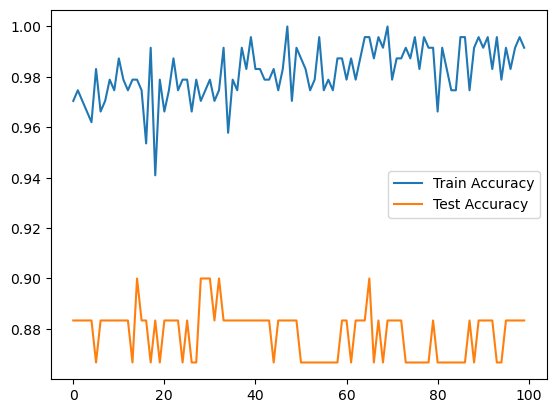

In [27]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()

plt.savefig('TrainTestAccuracy.png')
plt.show()

In [23]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

2/2 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8833
Test Accuracy: 0.88


## Confusion Matrix

2/2 [==============================] - 0s 1ms/step


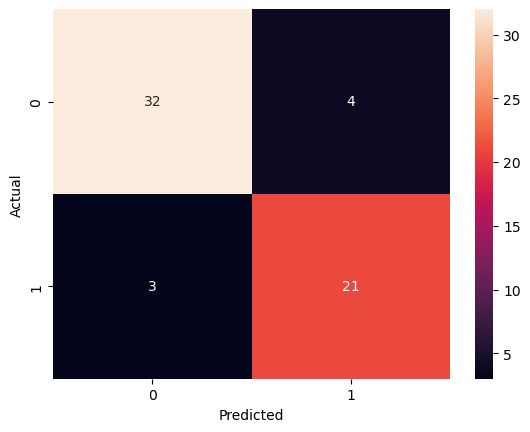

In [28]:
y_pred = (model.predict(X_test) >0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('PredictedActual_CM.png')
plt.show()

### Insights
The model classified 53 patients, giving an accuracy of 88.3%

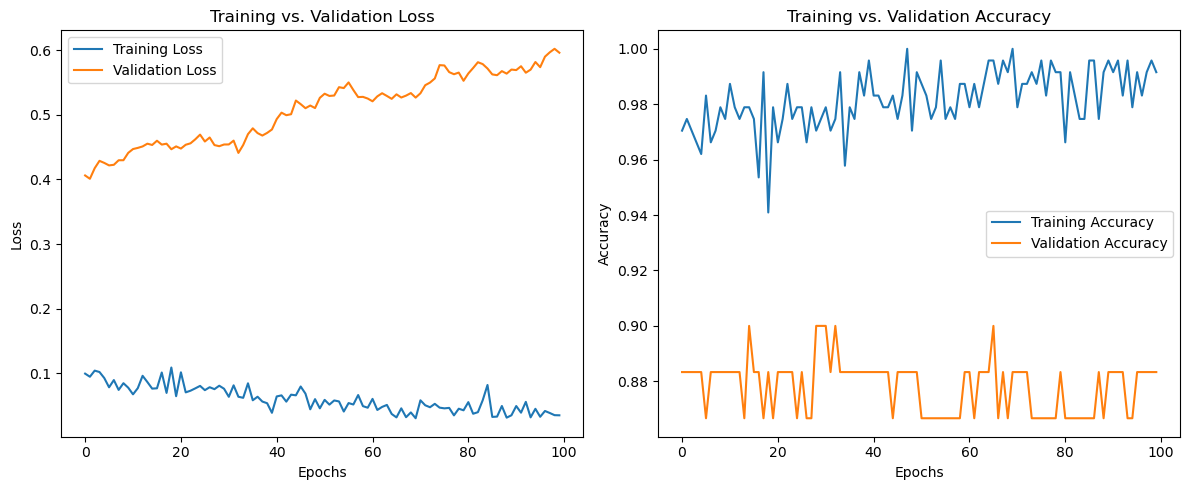

In [29]:
### Experimentation

import matplotlib.pyplot as plt

def plot_history(history):
    # Extract metrics from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Create subplots
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training vs. Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()

    plt.savefig('VisualizationforOverfitting.png')
    plt.show()

# Call the function
plot_history(history)

### Insight
> Validation Loss increasing while training loss stays at 0.1 indicates the model struggles to unseen data, which could lead to unreliable prediction

> The validation accuracy plateauing suggests that the model's performance on new data is capped, and further training without adjustments won't improve generalization

## Recommendations
1. Regularization
2. Early stopping adjustment
3. Try to create e simpler model
4. Cross Validation
5. Hyperparameter Tuning

## Author

### Francis Carl Sumile

Deep Learning and Machine Learning Enthusiast | Data Science<br>
github/francisuml